# Problem definition

### Given

item transactions from a store

### Goal

to predict item list above specific support and confidence

##### Requirement

apyori : https://github.com/ymoch/apyori

**installation** Choose one from the following.

- Install with pip :```pip3 install apyori```.
- Put *apyori.py* into your project.
- Run :```python3 setup.py install```.

# Prepare libraries

In [1]:
import collections
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from apyori import apriori

%matplotlib inline

# Read data

In [2]:
store_data = pd.read_csv('./toy_data.csv')

In [3]:
store_data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### There is no header at the first line.

In [4]:
store_data = pd.read_csv('./toy_data.csv', header=None)

In [5]:
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(store_data.shape)

(7501, 20)


##### Change the data set into list of list to apply Apriori library. 

In [7]:
transactions = []
for i in range(len(store_data)):
    temp = []
    for j in range(len(store_data.iloc[i])):
        item = str(store_data.iloc[i][j])
        if item == 'nan':
            continue
        temp.append(item)
    transactions.append(temp)

##### Check item count

In [8]:
item_count = dict()

for i in range(len(transactions)):
    for j in range(len(transactions[i])):
        cnt = 1
        item = str(transactions[i][j])
        if item in item_count:
            cnt += item_count.get(item)
        item_count[item] = cnt

# sort dictionary by name of item
item_count = collections.OrderedDict(sorted(item_count.items()))

print('Therer are',len(item_count),'items.')

for k in item_count:
    print(k,":", item_count.get(k))

Therer are 120 items.
 asparagus : 1
almonds : 153
antioxydant juice : 67
asparagus : 35
avocado : 250
babies food : 34
bacon : 65
barbecue sauce : 81
black tea : 107
blueberries : 69
body spray : 86
bramble : 14
brownies : 253
bug spray : 65
burger sauce : 44
burgers : 654
butter : 226
cake : 608
candy bars : 73
carrots : 115
cauliflower : 36
cereals : 193
champagne : 351
chicken : 450
chili : 46
chocolate : 1230
chocolate bread : 32
chutney : 31
cider : 79
clothes accessories : 63
cookies : 603
cooking oil : 383
corn : 36
cottage cheese : 239
cream : 7
dessert wine : 33
eggplant : 99
eggs : 1348
energy bar : 203
energy drink : 200
escalope : 595
extra dark chocolate : 90
flax seed : 68
french fries : 1282
french wine : 169
fresh bread : 323
fresh tuna : 167
fromage blanc : 102
frozen smoothie : 475
frozen vegetables : 715
gluten free bar : 52
grated cheese : 393
green beans : 65
green grapes : 68
green tea : 991
ground beef : 737
gums : 101
ham : 203
hand protein bar : 39
herb & pepp

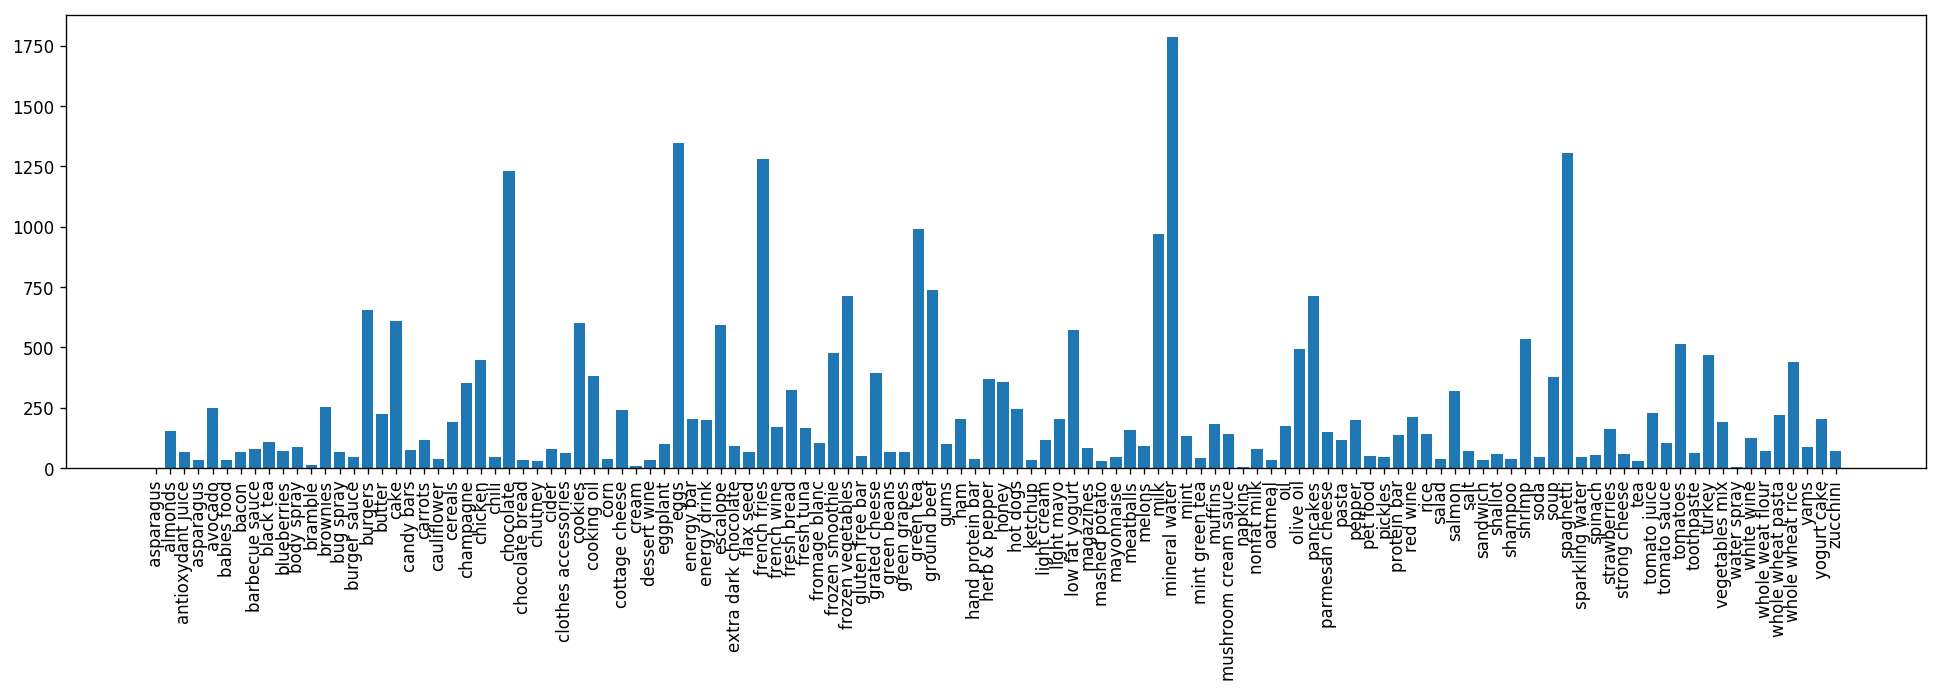

In [9]:
figure(num=None, figsize=(20, 5), dpi=120)
plt.bar(range(len(item_count)), list(item_count.values()), align='center')
plt.xticks(range(len(item_count)), list(item_count.keys()), rotation=90)

plt.show()

# Applying Apriori library

**Support **

ex) for item B

support(B) = (transactions containing (B)) / (total transactions)

**Confidence **

ex) The likelihood that an item B is also bought if item A is bought.

confidence(A &rarr; B) = (transactions containing both (A and B)) / (transactions containing A)

##### Default values of parmeters

See the code: https://github.com/ymoch/apyori/blob/master/apyori.py

The default values for parameters are

min_support = 0.1

min_confidence = 0.5

In [10]:
association_rules = apriori(
    transactions, 
    min_support=0.0045, 
    min_confidence=0.5, 
)

association_results = list(association_rules)

##### Which items are sold together?

In [11]:
print(len(association_results))

28


In [12]:
cnt = 1
for item in association_results:
    print(cnt)
    print("Rule:\t" + str(list(item.ordered_statistics[0][0])) + " -> " + str(list(item.ordered_statistics[0][1])))
    print("Support:\t",item.support)
    print("Confidence:\t", item.ordered_statistics[0][2])
    print('==============================================')
    cnt += 1

1
Rule:	['chicken', 'chocolate'] -> ['mineral water']
Support:	 0.007598986801759766
Confidence:	 0.5181818181818182
2
Rule:	['ground beef', 'chicken'] -> ['spaghetti']
Support:	 0.004799360085321957
Confidence:	 0.5070422535211266
3
Rule:	['chicken', 'pancakes'] -> ['mineral water']
Support:	 0.004799360085321957
Confidence:	 0.5294117647058824
4
Rule:	['chocolate', 'olive oil'] -> ['mineral water']
Support:	 0.008265564591387815
Confidence:	 0.5040650406504065
5
Rule:	['chocolate', 'soup'] -> ['mineral water']
Support:	 0.005599253432875617
Confidence:	 0.5526315789473685
6
Rule:	['cooking oil', 'eggs'] -> ['mineral water']
Support:	 0.006399146780429276
Confidence:	 0.5454545454545454
7
Rule:	['ground beef', 'cooking oil'] -> ['spaghetti']
Support:	 0.004799360085321957
Confidence:	 0.5714285714285714
8
Rule:	['pancakes', 'cooking oil'] -> ['mineral water']
Support:	 0.004666044527396347
Confidence:	 0.5932203389830508
9
Rule:	['ground beef', 'eggs'] -> ['mineral water']
Support:	 0